# Analysis of some life indicators

### Introduction:
I have used three datasets in this project taken from Gapminder, the first shows the percentage of people thinking that vaccine is not effective in each country, the second dataset shows the life expectancy age in each country, and the last dataset has the income per capita for each country.

### Questions:
-Is there a correlation between life expectancy and % of people thinking that vaccine is not effective is weak?

-When life expectancy in a country is high does it mean that % of people thinking that vaccine is not effective is low?
-When income increases/decreases does it mean that there is high probability that life expectancy will increase/decrease?

-What are the correlation coefficients between the two variables in the questions above?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the vaccine effective csv file
vc = pd.DataFrame()
vc = pd.read_csv('vccin_effect_dag.csv')
vc.head()

,country,2015,2018
0,Afghanistan,5.8,1.8
1,Albania,NaN,9.0
2,United Arab Emirates,NaN,3.4
3,Argentina,1.3,2.9
4,Armenia,13.9,12.5


Data Wrangling:
Some countries have NaN in 2018 but not in 2015. 
we will replace it with their values in 2015 and assume that it is the same.

In [3]:
vc.loc[vc['country'] == 'Fiji']

,country,2015,2018
42,Fiji,11.6,NaN


In [4]:
vc['2018'] = vc['2018'].fillna(vc['2015'])
#Fiji ha NaN in 2018, but now it's okay
vc.loc[vc['country'] == 'Fiji']

,country,2015,2018
42,Fiji,11.6,11.6


since many countries have NaN values for 2015, we will delete this column

In [5]:
vc = vc.drop(columns="2015")
vc.head()

,country,2018
0,Afghanistan,1.8
1,Albania,9.0
2,United Arab Emirates,3.4
3,Argentina,2.9
4,Armenia,12.5


In [6]:
#Reading the life expectancy csv file
lx = pd.DataFrame()
lx = pd.read_csv('life_expectancy_years.csv')
lx.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.1,82.2,82.3,82.4,82.5,82.6,82.7,82.8,82.9,83.0


Since the vaccine effective data is based only in 2018, we will drop all columns except 2018 column

In [7]:
lx.drop(lx.columns.difference(['country','2018']), 1, inplace=True)
lx.head()

,country,2018
0,Afghanistan,63.7
1,Angola,64.6
2,Albania,78.3
3,Andorra,NaN
4,United Arab Emirates,73.5


This function will merge two dataframes based on the country value, since we merged two dataframes multiple times we will aviod repetitive code.

In [8]:
def merge_fun(first_df,second_df):
   merged_df =  pd.merge(left=first_df, right=second_df, left_on='country', right_on='country')
   return merged_df

We have mereged the two dataframes to be able to compare & discover the correlation between Life expectancy & % of people thinking that Vaccine is not effective in each country.

In [9]:
#Merged the two tables based on the value of country
merged_inner = merge_fun(lx,vc)

merged_inner = merged_inner.rename(columns = {'2018_x': 'Life expectancy', '2018_y': '%_Vacc_Not_effective'}, inplace = False)
#We are already sure that there is no NaN in vaccine data,but we need to make sure that there is no NaN in Life excpectancy file
print(merged_inner['Life expectancy'].isnull().values.any())
merged_inner.tail()

False


,country,Life expectancy,%_Vacc_Not_effective
141,Vietnam,74.6,3.6
142,Yemen,68.1,3.2
143,South Africa,66.6,10.8
144,Zambia,63.7,8.2
145,Zimbabwe,61.7,1.9


Data analysis and visuliazation step : we will display life expectancy & % of people thinking that Vaccine is not effective in each country in a scatter diagram.

                      Life expectancy  %_Vacc_Not_effective
Life expectancy              1.000000             -0.159062
%_Vacc_Not_effective        -0.159062              1.000000


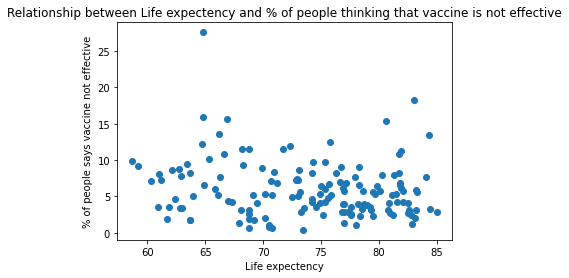

In [10]:
#Data analysis and visuliazation step
print(merged_inner.corr())
plt.scatter(merged_inner['Life expectancy'], merged_inner['%_Vacc_Not_effective'])
plt.title("Relationship between Life expectency and % of people thinking that vaccine is not effective")
plt.xlabel("Life expectency")
plt.ylabel("% of people says vaccine not effective")
plt.show()

The scatter digram shows weak negative correlation between the two variables, meaning that they are slightly moving in the opposite direction. 

Here i will display the correlation between the two variables in a heatmap.

interpretation:

-The dark blue color means very weak relationship.

-The bright brown color means that the variables are strongly positive correlated.In this case it's within the same variable.

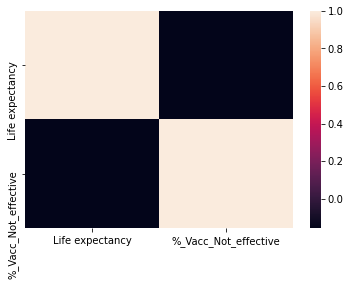

In [11]:
import seaborn as sns
cormat = merged_inner.corr()
round(cormat,2)
sns.heatmap(cormat);

Data wrangling:
In the first half of the code we will first read income_per_person_gdppercapita_ppp_inflation_adjusted file and then create a new column which is the average of the increase/decrease over the last 10 years. Also we need to remove data that is after 2021 because we are not intersted in expectations, and we also need to remove data that is before 2011 because we want to limit the analysis to recent data.

The second half replaces k or m with float values so that we can perform some mathmetical operations such as average on it.

In [12]:
# Reading the income per person data
inc = pd.DataFrame()
inc = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
# create new column which is the average of the increase/decrease over the last 10 years.
inc['Average increase/decrease over 10 yrs'] = inc.apply(lambda _: '', axis=1)

# Data wrangling phase:removing data that is after 2021.
inc = inc.loc[:,"country":"2021"]
# Data wrangling phase:removing data that is before 2011.
inc = inc.drop(inc.loc[:, '1800':'2010'].columns, axis = 1)
# Data wrangling phase:droping rows that has NaN.
inc = inc.dropna()

# Data wrangling phase:replacing k or m with float values.
c=0
year = 2011
while c<=10:
    
    year_str = str(year)
    inc[year_str] = (inc[year_str].replace(r'[kM]+$', '', regex=True).astype(float) * \
               inc[year_str].str.extract(r'[\d\.]+([kM]+)', expand=False)
                 .fillna(1)
                .replace(['k','M'], [10**3, 10**6]).astype(int))
    c=c+1
    year = year+1
    
inc.head()

,country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,1630.0,1770.0,1810.0,1800.0,1770.0,1760.0,1760.0,1740.0,1760.0,1800.0,1850.0
1,Angola,6350.0,6650.0,6730.0,6810.0,6650.0,6260.0,6050.0,5730.0,5540.0,5440.0,5440.0
2,Albania,10200.0,10400.0,10500.0,10700.0,11000.0,11400.0,11800.0,12300.0,12700.0,13200.0,13800.0
3,Andorra,42000.0,41900.0,43700.0,44900.0,46600.0,48200.0,49800.0,51500.0,53200.0,55000.0,56900.0
4,United Arab Emirates,56600.0,57900.0,60400.0,62900.0,65800.0,67000.0,66700.0,66600.0,65700.0,65300.0,65100.0


Here we will compute the average increase/decrease in income for each country in the last 10 years.

In [13]:
import numpy as np
a=[]
# Calculate the average increase/decrease in income for each country
for key, value in inc.iterrows():
    p=value.to_numpy()
    c=0
    i = 1
    while c<10:
        diff = p[i+1] - p[i]
        rate = diff / p[i] * 100
        a = np.append(a, rate)
        
        if c == 9:
            avg =  np.mean(a)
            inc.loc[key, 'Average increase/decrease over 10 yrs'] = avg
            a=[]
        c=c+1
        i=i+1
inc.head()

,country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average increase/decrease over 10 yrs
0,Afghanistan,1630.0,1770.0,1810.0,1800.0,1770.0,1760.0,1760.0,1740.0,1760.0,1800.0,1850.0,1.312829
1,Angola,6350.0,6650.0,6730.0,6810.0,6650.0,6260.0,6050.0,5730.0,5540.0,5440.0,5440.0,-1.486285
2,Albania,10200.0,10400.0,10500.0,10700.0,11000.0,11400.0,11800.0,12300.0,12700.0,13200.0,13800.0,3.074774
3,Andorra,42000.0,41900.0,43700.0,44900.0,46600.0,48200.0,49800.0,51500.0,53200.0,55000.0,56900.0,3.089564
4,United Arab Emirates,56600.0,57900.0,60400.0,62900.0,65800.0,67000.0,66700.0,66600.0,65700.0,65300.0,65100.0,1.432374


Data wrangling:
Here we will first read life expectancy file and then create a new column which is the average of the increase/decrease over the last 10 years. Also we need to remove data that is after 2021 because we are not intersted in expectations, and we also need to remove data that is before 2011 because we want to limit the analysis to recent data.

In [14]:
#Reading the life expectancy csv file
lx = pd.DataFrame()
lx = pd.read_csv('life_expectancy_years.csv')

# Applying the same process with income data above.
lx = lx.loc[:,"country":"2021"]
lx = lx.drop(lx.loc[:, '1800':'2010'].columns, axis = 1)
lx = lx.dropna()
lx['Average increase/decrease over 10 yrs'] = lx.apply(lambda _: '', axis=1)
lx.head()

,country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average increase/decrease over 10 yrs
0,Afghanistan,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4,64.7,
1,Angola,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4,65.7,
2,Albania,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6,78.7,
4,United Arab Emirates,72.9,72.9,73.0,73.1,73.1,73.2,73.3,73.5,73.6,73.8,73.9,
5,Argentina,75.9,76.0,76.1,76.4,76.5,76.5,76.7,76.8,77.0,77.1,77.3,


Here we will compute the average increase/decrease in life expectancy for each country in the last 10 years.

In [15]:
import numpy as np
a=[]
# Calculate the average increase/decrease in life expectancy for each country
for key, value in lx.iterrows():
    p=value.to_numpy()
    c=0
    i = 1
    while c<10:
        diff = p[i+1] - p[i]
        rate = diff / p[i] * 100
        a = np.append(a, rate)
        
        if c == 9:
            avg =  np.mean(a)
            lx.loc[key, 'Average increase/decrease over 10 yrs'] = avg
            a=[]
        
        c=c+1
        i=i+1
lx.head()

,country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average increase/decrease over 10 yrs
0,Afghanistan,60.4,60.8,61.3,61.2,61.2,61.2,63.4,63.7,64.1,64.4,64.7,0.695125
1,Angola,60.6,61.3,61.9,62.8,63.3,63.8,64.2,64.6,65.0,65.4,65.7,0.811724
2,Albania,77.7,77.8,77.9,77.9,78.0,78.1,78.2,78.3,78.5,78.6,78.7,0.127977
4,United Arab Emirates,72.9,72.9,73.0,73.1,73.1,73.2,73.3,73.5,73.6,73.8,73.9,0.136372
5,Argentina,75.9,76.0,76.1,76.4,76.5,76.5,76.7,76.8,77.0,77.1,77.3,0.182995


In the cell below i have removed yearly data because it's no longer needed, the analysis will be performed on the average increase/decrease in life expectancy & income.

In [16]:
# Data wrangling phase:removing yearly data after computing the average.
inc = inc.drop(inc.loc[:, '2011':'2021'].columns, axis = 1)

lx = lx.drop(lx.loc[:, '2011':'2021'].columns, axis = 1)
# Merging the two dataframes the life expectency and the income
merge_2 = merge_fun(lx,inc)
merge_2 = merge_2.rename(columns = {'Average increase/decrease over 10 yrs_x': 'increase/decrease in Life expectancy', 'Average increase/decrease over 10 yrs_y': 'increase/decrease in income'}, inplace = False)
merge_2.head()

,country,increase/decrease in Life expectancy,increase/decrease in income
0,Afghanistan,0.695125,1.312829
1,Angola,0.811724,-1.486285
2,Albania,0.127977,3.074774
3,United Arab Emirates,0.136372,1.432374
4,Argentina,0.182995,-1.373260


                                      increase/decrease in Life expectancy  \
increase/decrease in Life expectancy                              1.000000   
increase/decrease in income                                       0.113329   

                                      increase/decrease in income  
increase/decrease in Life expectancy                     0.113329  
increase/decrease in income                              1.000000  


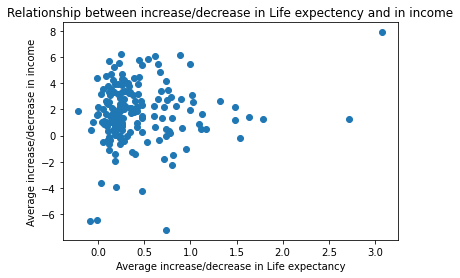

In [17]:
# Change the column type so that .corr() function can be executed
merge_2["increase/decrease in Life expectancy"] = pd.to_numeric(merge_2["increase/decrease in Life expectancy"])
#Data analysis and visuliazation step
print(merge_2.corr())
#The scatter digram shows weak correlation
plt.scatter(merge_2['increase/decrease in Life expectancy'], merge_2['increase/decrease in income'])
plt.title("Relationship between increase/decrease in Life expectency and in income")
plt.xlabel("Average increase/decrease in Life expectancy")
plt.ylabel("Average increase/decrease in income")
plt.show()

# Conclusion

### Results:

-The scatter digram shows weak negative correlation between the two variables(life expectancy & % of people thinking that vaccine is not effective), meaning that they are slightly moving in the opposite direction.
-As we can see in both the correlation matrix & the scatter diagram for the average increase/decrease in life expectancy & the average increase/decrease in income analysis , there is strong positive correlation between the average increase/decrease in life expectancy & the average increase/decrease in income, meaning that there is a tendency when the income increases life expectancy is expected to increase.

### Limitations:
The reliability of the data can be questioned since it has intensive historical(from 1800) & prediction for years that is after 2021, also the data has number of countries that have NaN values in some years which forced me to assume & replace the NaN values in 2018 with 2015 values for some countries in the % of people thinking vaccine is not effective dataset. Also one important thing to remember is that correlation does not imply causation.